# Introduction

#### This project is about predicting the workation trip price for a person.

#### The workation trip price will be based on various factors such as destination location, hotels and their amenities, and so on.

### Import Necessary Packages

In [15]:
import pandas as pd #for data manipulation
import numpy as np #for mathematical operations
import seaborn as sns #for visualization
from plotnine import * #for visualization (based on ggplot library)
import warnings
warnings.filterwarnings('ignore') #ignore warning message

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

### Import Train and Test Dataset

In [17]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

### Let structure of the train and test dataset

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

#### In train dataset there are 15 columns(including target column) and 21000 data entries.
#### The target columns is **Per Person Price**

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Uniq Id                     9000 non-null   object
 1   Package Name                9000 non-null   object
 2   Package Type                9000 non-null   object
 3   Destination                 9000 non-null   object
 4   Itinerary                   9000 non-null   object
 5   Places Covered              9000 non-null   object
 6   Travel Date                 9000 non-null   object
 7   Hotel Details               9000 non-null   object
 8   Start City                  9000 non-null   object
 9   Airline                     9000 non-null   object
 10  Flight Stops                9000 non-null   int64 
 11  Meals                       9000 non-null   int64 
 12  Sightseeing Places Covered  9000 non-null   object
 13  Cancellation Rules          9000 non-null   obje

#### In test dataset there are 14 columns and 9000 data entries.

### Let's view the sample data from train and test dataset

In [20]:
train.head(2)

Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   

                                   Package Name Package Type  \
0  Best of Shimla and Manali Holiday from Delhi     Standard   
1                       Kashmir Valley vacation      Premium   

                          Destination  \
0  New Delhi|Shimla|Manali|Chandigarh   
1          Srinagar|Pahalgam|Srinagar   

                                           Itinerary  \
0  1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...   
1            1N Srinagar . 2N Pahalgam . 1N Srinagar   

                       Places Covered Travel Date  \
0  New Delhi|Shimla|Manali|Chandigarh  30-07-2021   
1          Srinagar|Pahalgam|Srinagar  08-12-2021   

                                       Hotel Details Start City  \
0                                      Not Available     Mumbai   
1  The Orchard Retreat & Spa:4.6|WelcomHotel Pine...  New Delhi   

         Airline  Flight Stops  Meals  \
0  Not Available             2      3   
1  IndiGo|IndiGo             0      5   

                          Sightseeing Places Covered  \
0                                      Not Available   
1   Dal Lake | Avantipura Ruins | Mughal Gardens ...   

                                  Cancellation Rules  Per Person Price  
0                                      Not Available           11509.0  
1  Cancellation any time after making the 1st pay...           22485.5

In [21]:
test.head(2)

Uniq Id  \
0  12c47aefbcca65d6156ba0bc7946704b   
1  156febf7d27315ae9f210ed13bca3ac2   

                                        Package Name Package Type Destination  \
0     Goa 5N stay with flights & Transfers-North Goa       Luxury         Goa   
1  Into the Wild - Weekend at Bandipur National Park       Luxury    Bandipur   

     Itinerary Places Covered Travel Date  \
0       5N Goa            Goa  13-07-2021   
1  2N Bandipur       Bandipur  20-03-2021   

                                      Hotel Details Start City        Airline  \
0                      Novotel Goa Resort & Spa:4.1  New Delhi         IndiGo   
1  The Windflower Jungle Resorts & Spa Bandipur:4.4  New Delhi  Not Available   

   Flight Stops  Meals Sightseeing Places Covered  \
0             0      4              Not Available   
1             0      4    Bandipur National Park    

                                  Cancellation Rules  
0  Cancellation any time after making the 1st pay...  
1  This cancellation policy is applicable for boo...

### Let's check if there is any missing value in train and test dataset.

In [22]:
train.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

#### The above summary shows that there is no missing in any column.

In [23]:
test.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
dtype: int64

#### The above summary shows that there is no missing in any column.

### let's perform exploratory data analysis and see how the workation destination price has changing based on various factors.

### let's see target column(**Per Person Price**) distribution.

#### Let's create a function to find a inter-quartile-range.

In [24]:
def iqr(x: [int,float])->[int,float]:
    """Inter_Quartile-Range.
    
    with the help of numpy percentile function we can get the 1st and 3rd quartile.
    Then subtract the 1st quartile value from 3rd quartile.
    
    parameters:
    -----------
    input: list of numerical values,array
    return: single nummerical value.
    """
    q1_x = np.percentile(x, 25, interpolation='midpoint')
    q3_x = np.percentile(x, 75, interpolation='midpoint')
    return q3_x - q1_x

### Let's create a fuction to find a optimal bin width by using **Freedman Diaconis Rule**

In [25]:
def bin_w(x: [int,float])->[int,float]:
    """
    with help of above iqr function we can get iqr value.
    Using the iqr value and the following freedman diaconis formula we can get optimal bin width.
    
    parametes:
    ----------
    input: list of numerical values,array
    return: single nummerical value.
    
    """
    bw=(2 * iqr(x)) / np.power(x.shape[0], 1/3)
    return bw

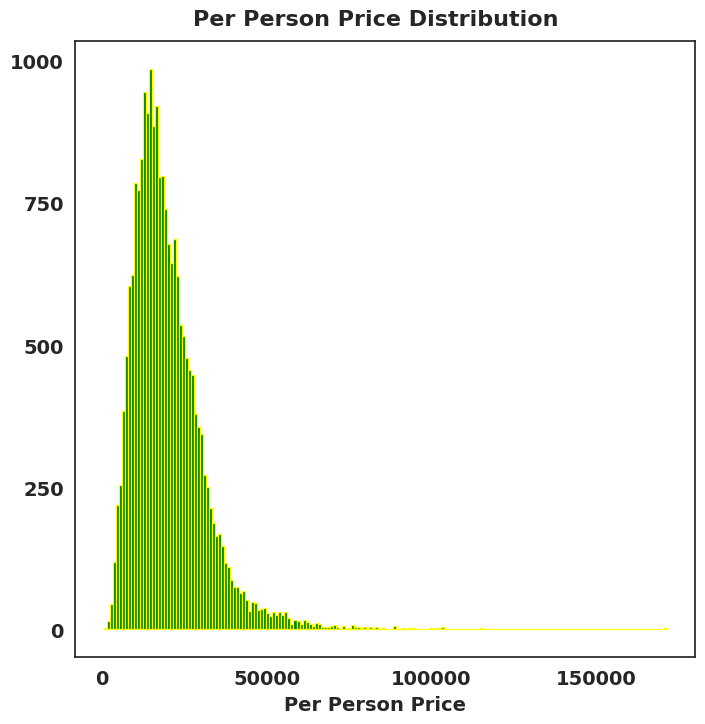

<ggplot: (-2133785903)>

In [26]:
price_bw=bin_w(train['Per Person Price'])
(ggplot(train)+geom_histogram(aes(x='Per Person Price'),fill='green',color='yellow',
                             binwidth=price_bw)+
labs(y='',title='Per Person Price Distribution')+
theme_seaborn(style='ticks')+
theme(figure_size=(8,8),
axis_ticks=element_blank(),      
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

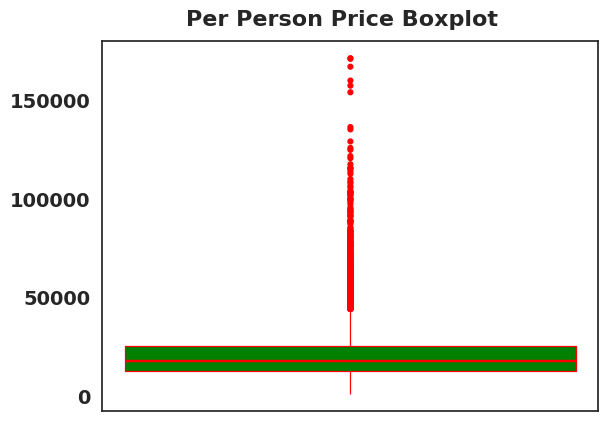

<ggplot: (-2133795170)>

In [27]:
(ggplot(train)+geom_boxplot(aes(x='0',y='Per Person Price'),fill='green',color='red'
                             )+
labs(x='',y='',title='Per Person Price Boxplot')+
theme_seaborn(style='ticks')+
theme(#figure_size=(8,8),
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_text_x=element_blank(),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [28]:
print("The Median is:",train['Per Person Price'].median())

The Median is: 17765.5


In [29]:
import statistics as st

In [30]:
print("The Mode is:",st.mode(train['Per Person Price']))

The Mode is: 6555.0


In [31]:
train['Per Person Price'].describe()

count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64

#### The above histogram explains that per person price distribution is right skewed(mode is less than median).
#### The boxplot explains that there are some outlier points outside q3.
#### The mean is 20059.

### Let' see how many workation trip packages are available.

In [32]:
train['Package Name'].nunique()

2204

#### There are 2204 unique workation trip packages.Let's compare the vaious package name with package type by using word cloud.

In [33]:
train['Package Type'].value_counts()

Deluxe      6006
Standard    5669
Premium     5581
Luxury      3278
Budget       466
Name: Package Type, dtype: int64

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

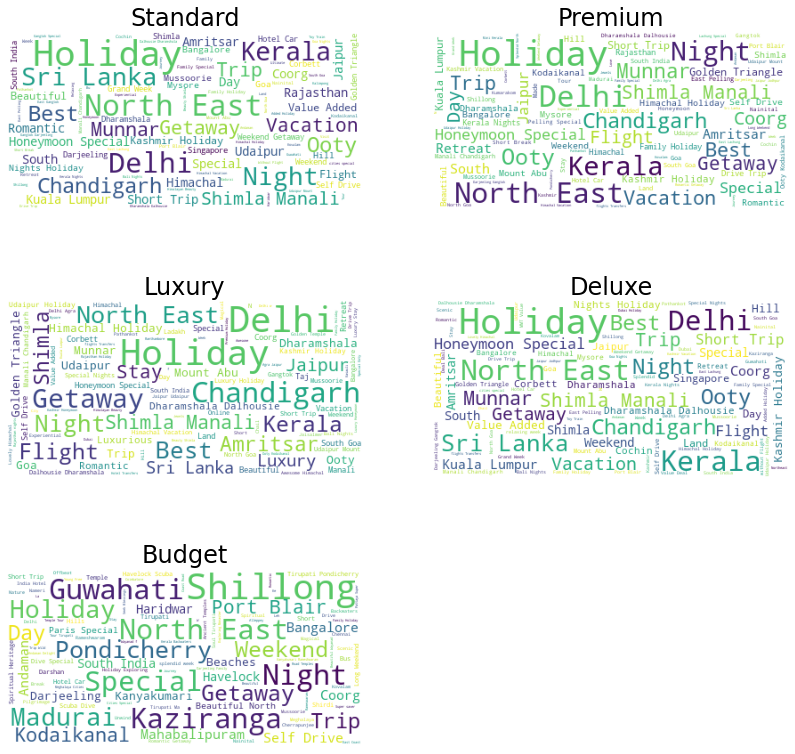

In [35]:
c=1
fig=plt.figure(figsize=(14, 14))
for x in train['Package Type'].unique():
    wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train[train['Package Type']==x]['Package Name'].to_string())  
   
    plt.subplot(3,2,c)
    plt.imshow(wc)
    plt.title(x,fontsize='24',fontweight='20')
    plt.axis("off")
    c+=1
plt.show() 

#### The above wordcloud shows various package names under different types of workation trip package.

### Let's analyse relationship between price and pacakge types.

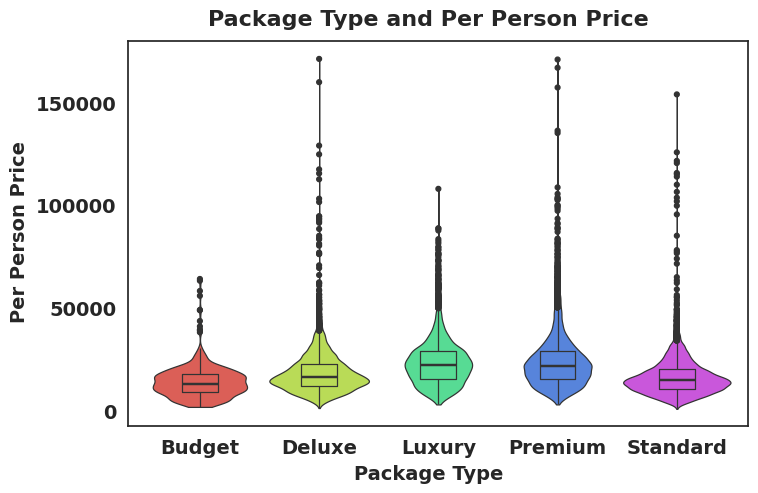

<ggplot: (-2131148103)>

In [36]:
(ggplot(train)+geom_violin(aes(x='Package Type',y='Per Person Price',
                               fill='Package Type'
                               ))+

geom_boxplot(aes(x='Package Type',y='Per Person Price'),fill=None,width=0.3)+
labs(title='Package Type and Per Person Price')+
theme_seaborn(style='ticks')+
theme(figure_size=(8,5),
legend_position='none',      
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [37]:
train.groupby(['Package Type'],as_index=False).agg({'Per Person Price':['min','median','mean','max']})

Package Type Per Person Price                                  
                            min    median          mean       max
0       Budget           1757.0  13114.25  14151.447425   64008.5
1       Deluxe           1198.0  16426.75  18409.508825  171062.5
2       Luxury           2963.0  22222.50  23679.556437  107850.0
3      Premium           2967.0  21767.50  23965.407006  170763.0
4     Standard            791.0  14729.50  16354.089081  153795.0

#### The above violin plot explains that there is a significant difference between the **package type** and **per person price**.
#### The minimum per person price difference between luxury and deluxe package margin is too low.

### Let's calculate the number of night stay of each packages.

#### The **Itinerary** column has the destination location name and its number of night stay information.

#### Let's collect those numbers and find a total staying night.

In [38]:
import re #regular expression

In [39]:
#create function to extract the numbers from 'Itinerary' column and convert it into integer list then retrun the sum of list.
def sum_n(x):
    """
    parameters:
    ----------- 
    input: object(mixed data types)
    output: integer
    """
    if not None:
        r=[]
        a=re.findall(r'\d+',x)#extract the numbers in Itinerary column
        for i in a:
            r.append(int(i))#convert string to integer and store it in new list
    return sum(r)  

In [40]:
#create a new column to store the total days of stay 
train["total_days_stay"] = train['Itinerary'].map(sum_n) #using map function to map the created sum_n function 

### Let's see package type-wise total days of stay.

In [41]:
tot_nights=(train.
            groupby(['Package Type','total_days_stay']).
        agg({'total_days_stay':['count']}))

tot_nights.columns = ['total']
tot_nights=tot_nights.sort_values(["Package Type","total"], ascending=False).reset_index()
tot_nights=tot_nights[tot_nights['total']>0]

tot_nights=tot_nights.astype({'total_days_stay':'category'})


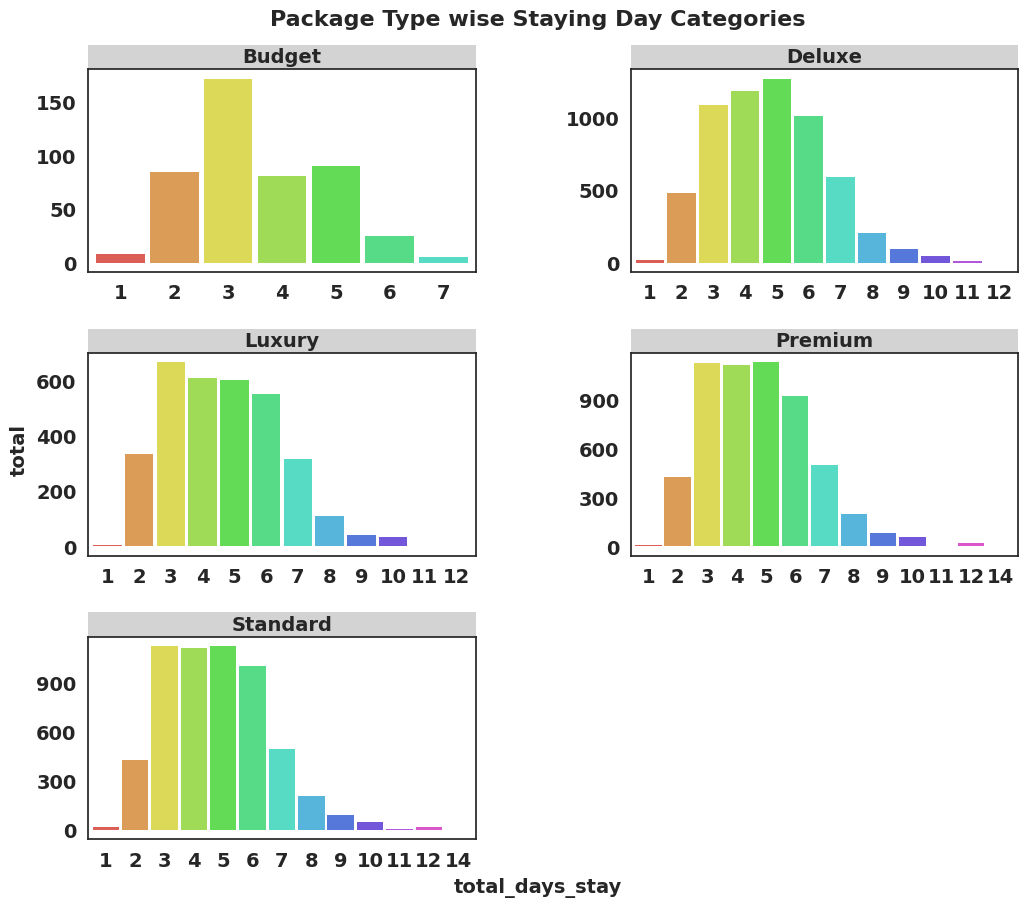

<ggplot: (14100637)>

In [42]:
(ggplot(tot_nights)+
 geom_bar(aes(x='total_days_stay',y='total',
                               fill='total_days_stay'
                               ),stat='identity')+
facet_wrap('Package Type',scales='free',ncol=2)+
#scale_x_discrete(limits=num_place_package['Package Type'].index) +
labs(title='Package Type wise Staying Day Categories')+
theme_seaborn(style='ticks')+
theme(figure_size=(12,10),
legend_position='none', 
subplots_adjust={'hspace': 0.4,'wspace': 0.4} ,
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that the budget workation trip package has more number of three-days stay packages.
#### The standard, premium, luxury, and deluxe workation trip packages have more number of 3 to 6-days stay packages.

### Let's compare the price distribution between the package type and total days of stay.

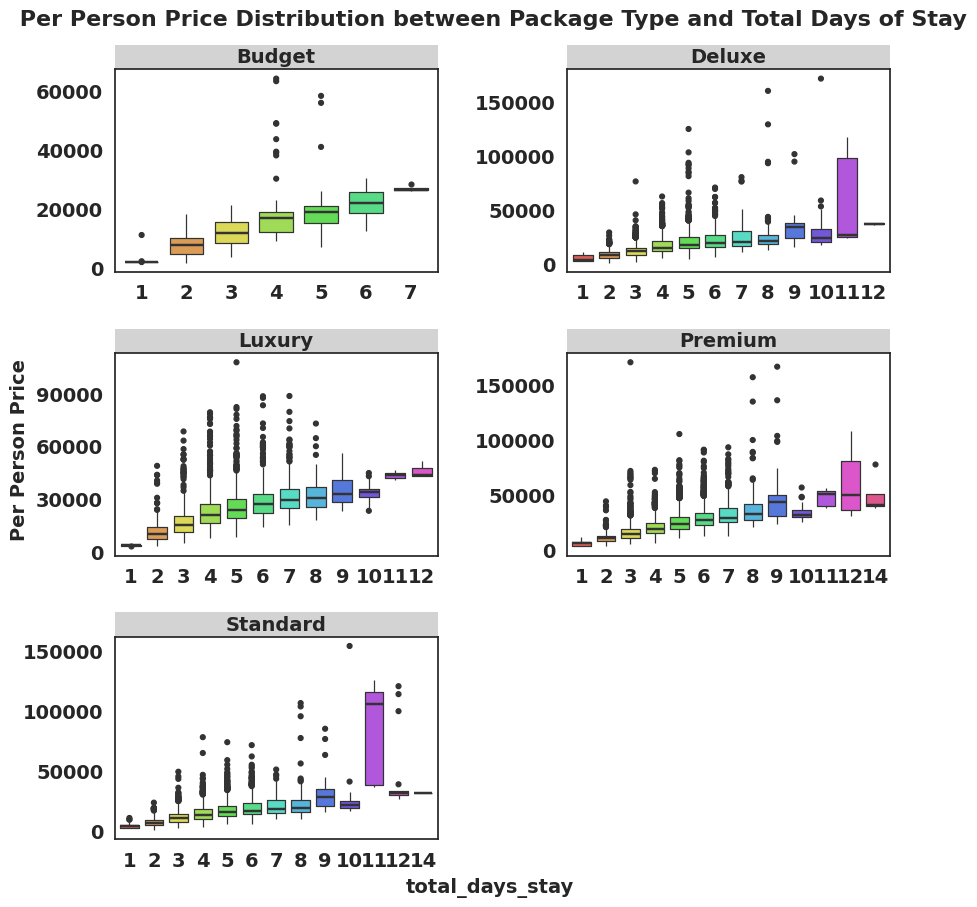

<ggplot: (16319410)>

In [43]:
(ggplot(train.astype({'total_days_stay':'category'}))+geom_boxplot(aes(x='total_days_stay',y='Per Person Price',
                               fill='total_days_stay'
                               ))+
facet_wrap('Package Type',scales='free',ncol=2)+
#geom_boxplot(aes(x='Package Type',y='Per Person Price'),fill=None,width=0.3)+
labs(title=' Per Person Price Distribution between Package Type and Total Days of Stay')+
theme_seaborn(style='ticks')+
theme(figure_size=(10,10),
legend_position='none',  
subplots_adjust={'hspace': 0.4,'wspace': 0.4} ,     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [44]:
#train[train['Package Type'].isin(['Premium','Standard'])].groupby(['Package Type','total_days_stay']).agg({'Per Person Price':['min','median','max']}).reset_index()

train.groupby(['Package Type','total_days_stay'],as_index=False).agg({'Per Person Price':['min','median','max']})

Package Type total_days_stay Per Person Price                     
                                             min     median       max
0        Budget               1           2000.0    2139.50   11158.5
1        Budget               2           1757.0    7685.00   18209.5
2        Budget               3           3736.0   11788.75   21197.5
3        Budget               4           9276.0   16732.50   64008.5
4        Budget               5           7130.5   19031.50   58173.5
5        Budget               6          12450.0   22039.50   30535.5
6        Budget               7          26129.5   26489.50   28529.5
7        Deluxe               1           2416.5    3630.50   11312.0
8        Deluxe               2           1198.0    8439.00   29225.0
9        Deluxe               3           2241.0   11854.00   76247.5
10       Deluxe               4           5445.5   15151.00   62373.0
11       Deluxe               5           4917.0   18000.00  124621.0
12       Deluxe               6           6342.0   19326.25   70631.5
13       Deluxe               7          11468.0   20525.50   80204.5
14       Deluxe               8          13458.5   21543.25  159740.0
15       Deluxe               9          15925.0   34509.00  101423.5
16       Deluxe              10          17615.5   24026.50  171062.5
17       Deluxe              11          24005.5   27000.50  117319.5
18       Deluxe              12          36097.5   37003.50   37909.5
19       Luxury               1           2963.0    3556.50    3972.5
20       Luxury               2           3138.0   10238.00   48887.0
21       Luxury               3           5131.0   15193.75   68477.0
22       Luxury               4           7550.5   21083.00   79400.0
23       Luxury               5           8487.5   23639.00  107850.0
24       Luxury               6          14268.0   27177.00   88525.0
25       Luxury               7          15232.0   29201.50   88657.0
26       Luxury               8          18011.0   30502.00   72972.0
27       Luxury               9          23198.5   32749.00   56453.5
28       Luxury              10          23266.5   33837.50   44811.0
29       Luxury              11          40686.5   43558.00   46429.5
30       Luxury              12          42841.0   43559.50   51558.0
31      Premium               1           2967.0    5842.00   12009.5
32      Premium               2           3029.5   10262.50   44097.0
33      Premium               3           5161.0   14145.50  170763.0
34      Premium               4           6319.5   18928.50   72811.5
35      Premium               5          10319.0   23274.50  105395.5
36      Premium               6          12796.5   27264.00   91155.0
37      Premium               7          12152.0   29280.75   93325.0
38      Premium               8          20689.0   32636.50  157143.0
39      Premium               9          23132.0   43110.50  166758.0
40      Premium              10          25579.0   32063.50   56700.5
41      Premium              11          37813.5   50402.50   56289.5
42      Premium              12          30676.0   49567.50  108548.5
43      Premium              14          37859.5   41185.00   78421.5
44     Standard               1           2403.5    3853.50   10941.5
45     Standard               2            791.0    6943.50   23661.5
46     Standard               3           2908.5   10592.00   49347.0
47     Standard               4           3667.0   13314.00   78037.5
48     Standard               5           5739.0   15649.50   73865.0
49     Standard               6           5823.5   16921.25   71432.0
50     Standard               7          10390.5   18274.00   51185.0
51     Standard               8          10424.5   19125.50  106364.0
52     Standard               9          15780.5   28634.75   85030.5
53     Standard              10          16837.5   21580.50  153795.0
54     Standard              11          36631.0  105832.50  125611.5
55     Standa

#### The chart explains that the per person workation trip price will increase based on the total days of stay.

#### The premium and Luxury package's 10-night stay trip's per person price is cheaper than the budget package's maximum price.


### Let's see which destination location is most popular based on categories of total days of stay.

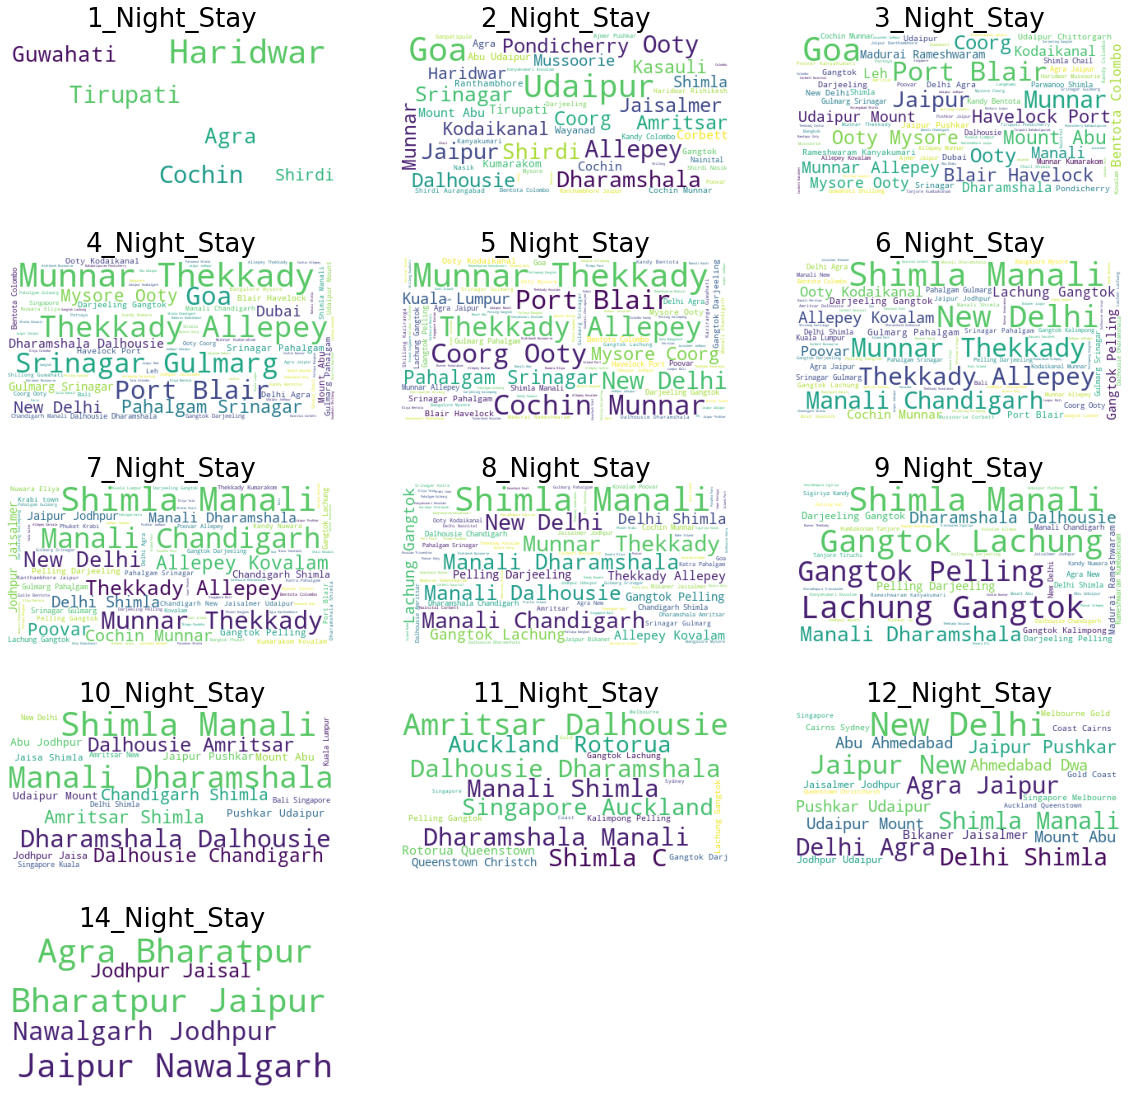

In [45]:
c=1
fig=plt.figure(figsize=(20, 20))
for x in train['total_days_stay'].sort_values().unique():
    wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train[train['total_days_stay']==x]['Places Covered'].to_string())  
    plt.subplot(5,3,c)
    plt.imshow(wc)
    plt.title(label="{}_Night_Stay".format(x) ,fontsize='26',fontweight='20')
    plt.axis("off")
    c+=1
plt.show()

#### The above wordcloud explains various most famous destination based on the total days of stay.

### Let's see how many destinations locations will be covered by each type of packages.

#### Let' create one function to count the number of destination places.

In [46]:
#function to count number of  location in each pacakage
def count_dest(x):
    """
    parameter:
    ----------
    
    input:string seperated by delimeter
    return:total count
    """
    if not None:
        l=0 
        s=x.split("|")
        l=len(s)
    return l

In [47]:
train['num_of_places']=train['Places Covered'].map(count_dest) #map count_dest function to column

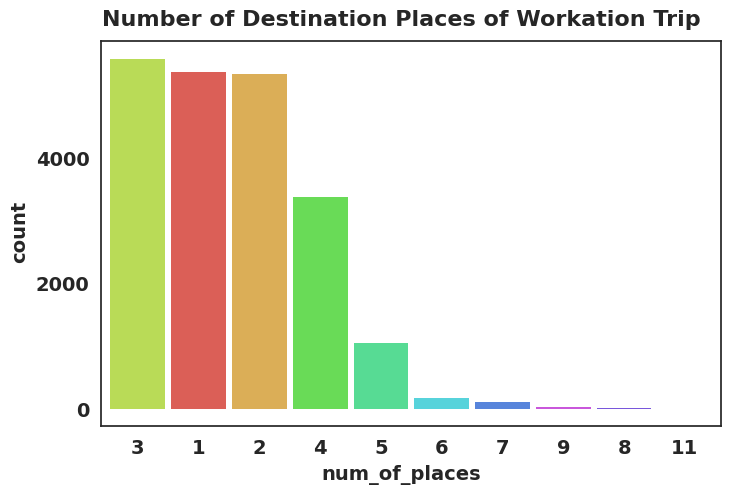

<ggplot: (-2130769801)>

In [48]:
(ggplot(train.astype({'num_of_places':'category'}))+geom_bar(aes(x='num_of_places',
                               fill='num_of_places'
                               ))+
scale_x_discrete(limits=train['num_of_places'].value_counts().index) +
labs(title='Number of Destination Places of Workation Trip')+
theme_seaborn(style='ticks')+
theme(figure_size=(8,5),
legend_position='none',       
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [49]:
train['num_of_places'].value_counts().sort_values(ascending=False)

3     5565
1     5363
2     5332
4     3363
5     1049
6      177
7      102
9       31
8       12
11       6
Name: num_of_places, dtype: int64

#### The above chart explains that most of the workation trips will have 1 to 4 destination locations.

### Let's see the number of locations count by package type.

In [50]:
num_place_package=(train[['Package Type','num_of_places']].
                   groupby(['Package Type','num_of_places'])['num_of_places'].
                   agg({'count'}).reset_index().sort_values(by=['Package Type','count'],ascending=False).
                   astype({'num_of_places':'category'}))

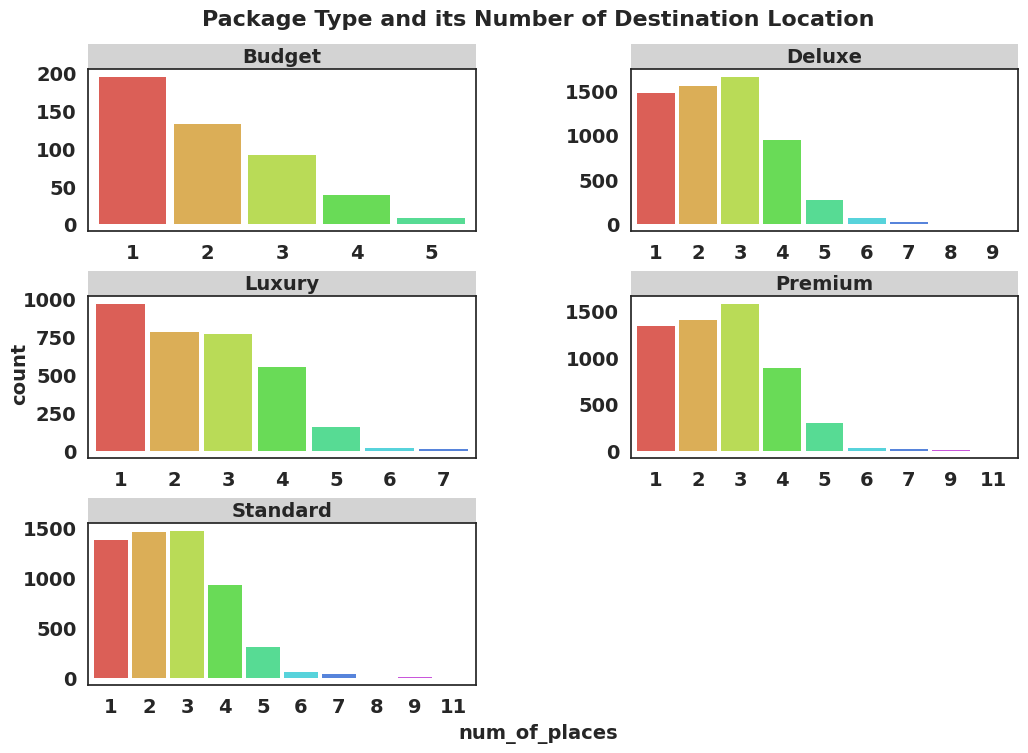

<ggplot: (-2130515461)>

In [51]:
(ggplot(num_place_package)+
 geom_bar(aes(x='num_of_places',y='count',
                               fill='num_of_places'
                               ),stat='identity')+
facet_wrap('Package Type',scales='free',ncol=2)+
#scale_x_discrete(limits=num_place_package['Package Type'].index) +
labs(title='Package Type and its Number of Destination Location')+
theme_seaborn(style='ticks')+
theme(figure_size=(12,8),
legend_position='none', 
subplots_adjust={'hspace': 0.4,'wspace': 0.4} ,
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that the budget workation trip package has mostly one destination location.
#### The deluxe, luxury, premium, and standard workation trip package have mostly 1 to 3 destination locations.

### Let's see is there any change between per person price and number of destinations 

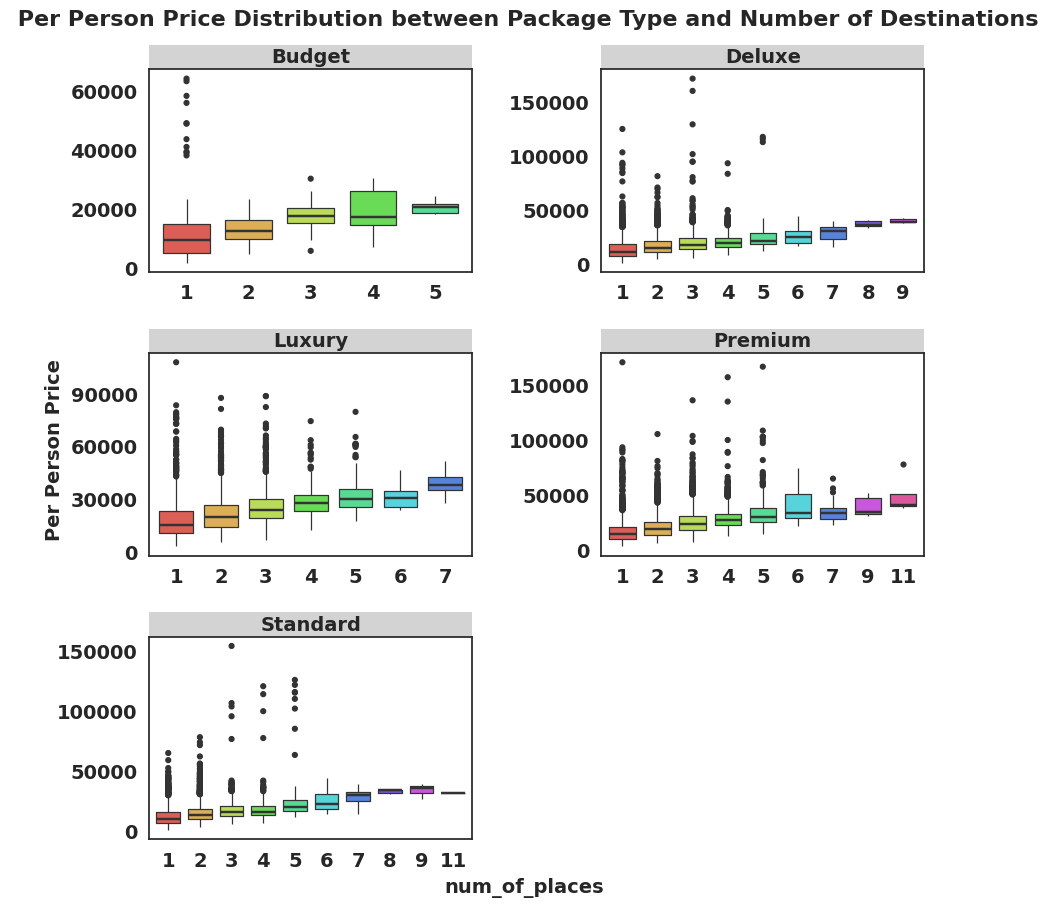

<ggplot: (16713512)>

In [52]:
(ggplot(train.astype({'num_of_places':'category'}))+geom_boxplot(aes(x='num_of_places',y='Per Person Price',
                               fill='num_of_places'
                               ))+
facet_wrap('Package Type',scales='free',ncol=2)+
#geom_boxplot(aes(x='Package Type',y='Per Person Price'),fill=None,width=0.3)+
labs(title=' Per Person Price Distribution between Package Type and Number of Destinations')+
theme_seaborn(style='ticks')+
theme(figure_size=(10,10),
legend_position='none',  
subplots_adjust={'hspace': 0.4,'wspace': 0.4} ,     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [53]:
(train[['Package Type','num_of_places','Per Person Price']].groupby(['Package Type','num_of_places']).
 agg({'Per Person Price':['min','mean','median','max']}).reset_index())

Package Type num_of_places Per Person Price                          \
                                           min          mean    median   
0        Budget             1           1757.0  11995.905128   9569.00   
1        Budget             2           4662.0  13094.981203  12478.50   
2        Budget             3           5798.0  17693.010989  17683.00   
3        Budget             4           7130.5  18928.820513  17089.00   
4        Budget             5          18182.0  20681.562500  20650.75   
5        Deluxe             1           1198.0  14871.682497  11501.25   
6        Deluxe             2           4833.5  17077.481326  14989.50   
7        Deluxe             3           5445.5  19860.283727  17356.50   
8        Deluxe             4           8735.0  20771.476241  19096.50   
9        Deluxe             5          12026.5  24383.120879  21650.00   
10       Deluxe             6          16649.5  25968.417910  24842.50   
11       Deluxe             7          16053.5  28570.462963  30830.00   
12       Deluxe             8          33367.0  36908.857143  35618.50   
13       Deluxe             9          37494.0  39888.800000  39085.50   
14       Luxury             1           2963.0  18582.862513  15267.50   
15       Luxury             2           5744.0  22243.000635  19585.50   
16       Luxury             3           6912.5  25993.461240  23982.00   
17       Luxury             4          12460.0  28383.847122  27506.75   
18       Luxury             5          17635.5  32107.977848  29904.25   
19       Luxury             6          23843.0  30743.970588  30354.50   
20       Luxury             7          27570.5  38421.266667  38175.50   
21      Premium             1           2967.0  17280.159701  13982.75   
22      Premium             2           6580.5  21409.310849  18864.50   
23      Premium             3           7419.0  26414.015893  23505.00   
24      Premium             4          12514.5  29132.800448  26750.50   
25      Premium             5          13915.0  33936.066007  29524.00   
26      Premium             6          21821.0  38429.916667  33358.75   
27      Premium             7          22704.0  36569.666667  33398.00   
28      Premium             9          30676.0  39332.181818  34570.00   
29      Premium            11          37859.5  49662.750000  41185.00   
30     Standard             1            791.0  12740.738612  10244.00   
31     Standard             2           3760.5  15305.353909  13246.50   
32     Standard             3           5560.5  17265.388060  15871.25   
33     Standard             4           6779.0  18135.082885  16220.50   
34     Standard             5          11984.5  23498.252443  20046.00   
35     Standard             6          14167.5  24824.675439  22259.00   
36     Standard             7          14440.0  28292.602564  29986.00   
37     Standard             8          31248.0  32999.100000  33796.50   
38     Standard             9          26767.5  34551.166667  36138.00   
39     Standard            11          31591.0  31682.500000  31682.50   

              
         max  
0    64008.5  
1    23274.5  
2    30186.0  
3    30535.5  
4    24364.5  
5   124621.0  
6    81099.0  
7   171062.5  
8    92999.0  
9   117319.5  
10   44448.5  
11   39983.5  
12   40261.5  
13   42114.5  
14  107850.0  
15   87564.5  
16   88657.0  
17   74352.5  
18   79631.5  
19   46429.5  
20   51558.0  
21  170763.0  
22  105395.5  
23  136155.5  
24  157143.0  
25  166758.0  
26   74716.0  
27   64803.0  
28   51270.0  
29   78421.5  
30   64880.5  
31   78037.5  
32  153795.0  
33  120377.5  
34  125611.5  
35   43774.0  
36   38901.0  
37   34393.0  
38   38906.5  
39   31774.0

#### The above boxplot explains the various price ranges based on the number of destinations.
#### The standard package with 11 destinations, that package's minimum, and maximum price is almost in a close range

### Let's see the Number of destination wise most popular workation trip location.

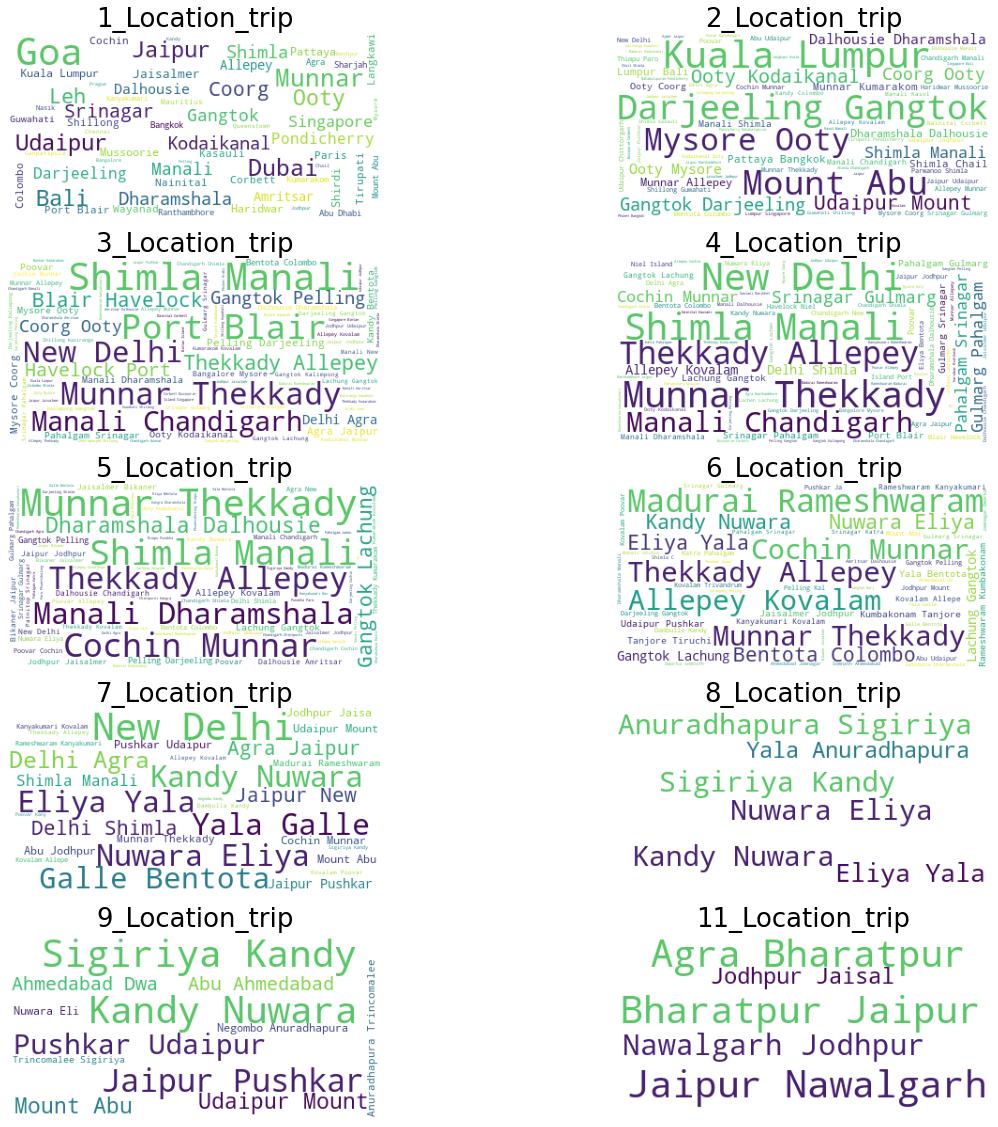

In [54]:
c=1
fig=plt.figure(figsize=(20,20))
for x in train['num_of_places'].sort_values().unique():
    wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train[train['num_of_places']==x]['Places Covered'].to_string())  
    plt.subplot(5,2,c)
    plt.imshow(wc)
    plt.title(label="{}_Location_trip".format(x) ,fontsize='26',fontweight='20')
    plt.axis("off")
    c+=1
plt.show()

#### The above wordcloud explain various popular workation trip location based on the number of destination.

### Let's see how per person price is changing over time.

In [55]:
train['Travel Date']=pd.to_datetime(train['Travel Date'], errors='coerce')

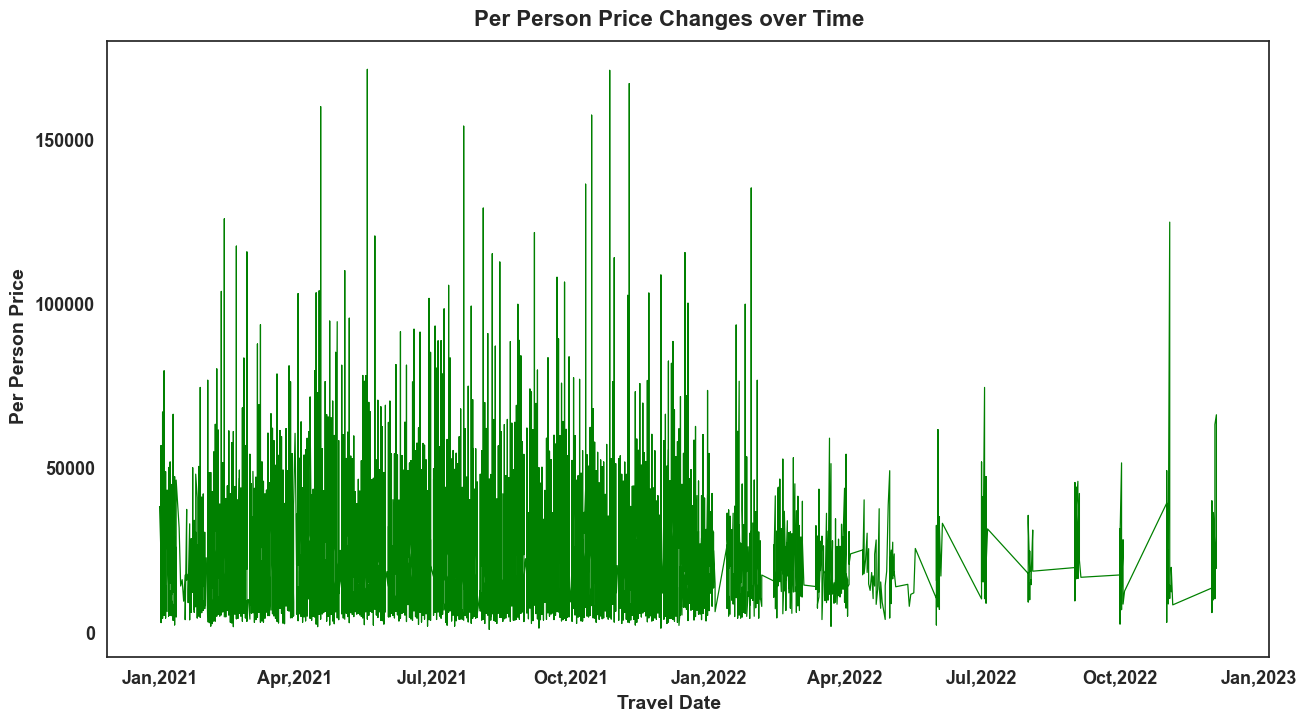

<ggplot: (16556804)>

In [78]:
(ggplot(train)+geom_line(aes(x='Travel Date',y='Per Person Price' ),color='green')+
scale_x_datetime(date_labels ="%b,%Y")+
labs(title='Per Person Price Changes over Time')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,8),     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=13,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

### Let's break down the date into month, year, quarter, and so on.

In [58]:
train['day'],train['day_label'],train['day_number'],train['month_number'],train['month_label'],train['year_quarter'],train['week_of_year'],train['year'] = train['Travel Date'].dt.day,train['Travel Date'].dt.day_name(),train['Travel Date'].dt.dayofweek,train['Travel Date'].dt.month,train['Travel Date'].dt.strftime('%b'),train['Travel Date'].dt.quarter,train['Travel Date'].dt.week, train['Travel Date'].dt.year

In [79]:
train.head(2)

Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   

                                   Package Name Package Type  \
0  Best of Shimla and Manali Holiday from Delhi     Standard   
1                       Kashmir Valley vacation      Premium   

                          Destination  \
0  New Delhi|Shimla|Manali|Chandigarh   
1          Srinagar|Pahalgam|Srinagar   

                                           Itinerary  \
0  1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...   
1            1N Srinagar . 2N Pahalgam . 1N Srinagar   

                       Places Covered Travel Date  \
0  New Delhi|Shimla|Manali|Chandigarh  2021-07-30   
1          Srinagar|Pahalgam|Srinagar  2021-08-12   

                                       Hotel Details Start City  \
0                                      Not Available     Mumbai   
1  The Orchard Retreat & Spa:4.6|WelcomHotel Pine...  New Delhi   

         Airline  ...  total_days_stay  num_of_places day day_label  \
0  Not Available  ...                6              4  30    Friday   
1  IndiGo|IndiGo  ...                4              3  12  Thursday   

   day_number  month_number  month_label  year_quarter week_of_year  year  
0           4             7          Jul             3           30  2021  
1           3             8          Aug             3           32  2021  

[2 rows x 25 columns]

### Let's package type wise per person price changes over time.

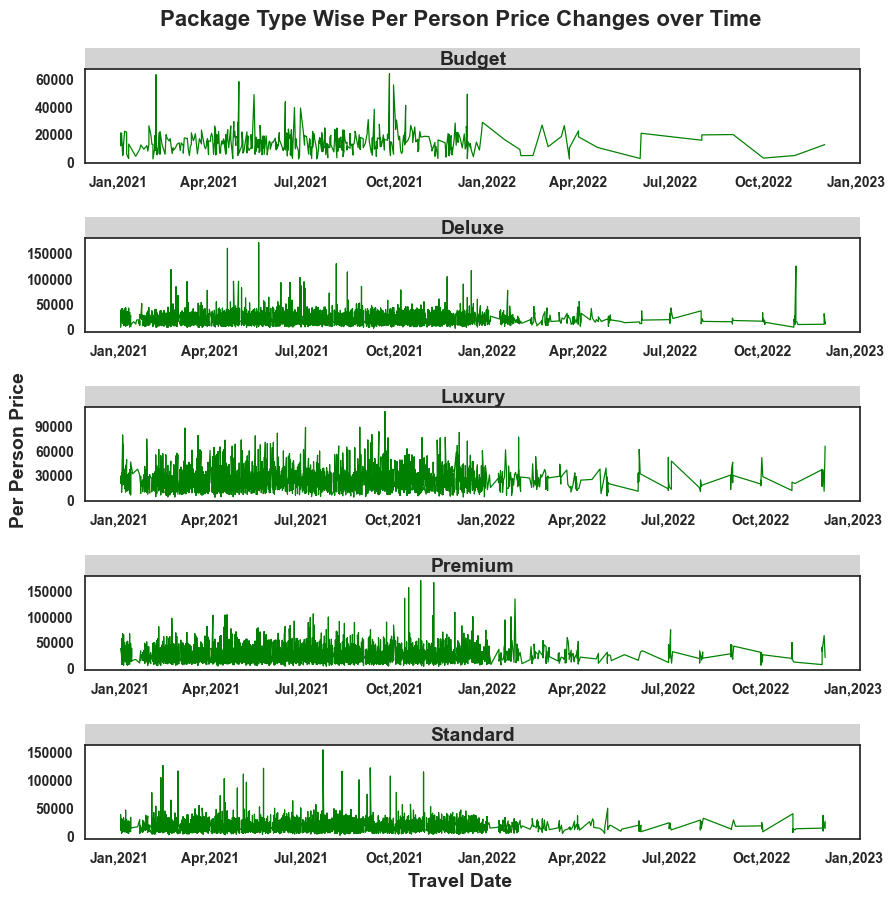

<ggplot: (-2130099527)>

In [81]:
(ggplot(train)+geom_line(aes(x='Travel Date',y='Per Person Price'),color='green')+
scale_x_datetime(date_labels ="%b,%Y")+
facet_wrap('Package Type',scales='free',ncol=1)+
labs(title='Package Type Wise Per Person Price Changes over Time')+
theme_seaborn(style='ticks')+
theme(figure_size=(10,10),
subplots_adjust={'hspace': 0.8,'wspace': 0.4} ,     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=10,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above line plot explains how price changes over time based on the package type.

### Let's see how per person price changes over time by various category days of stay.

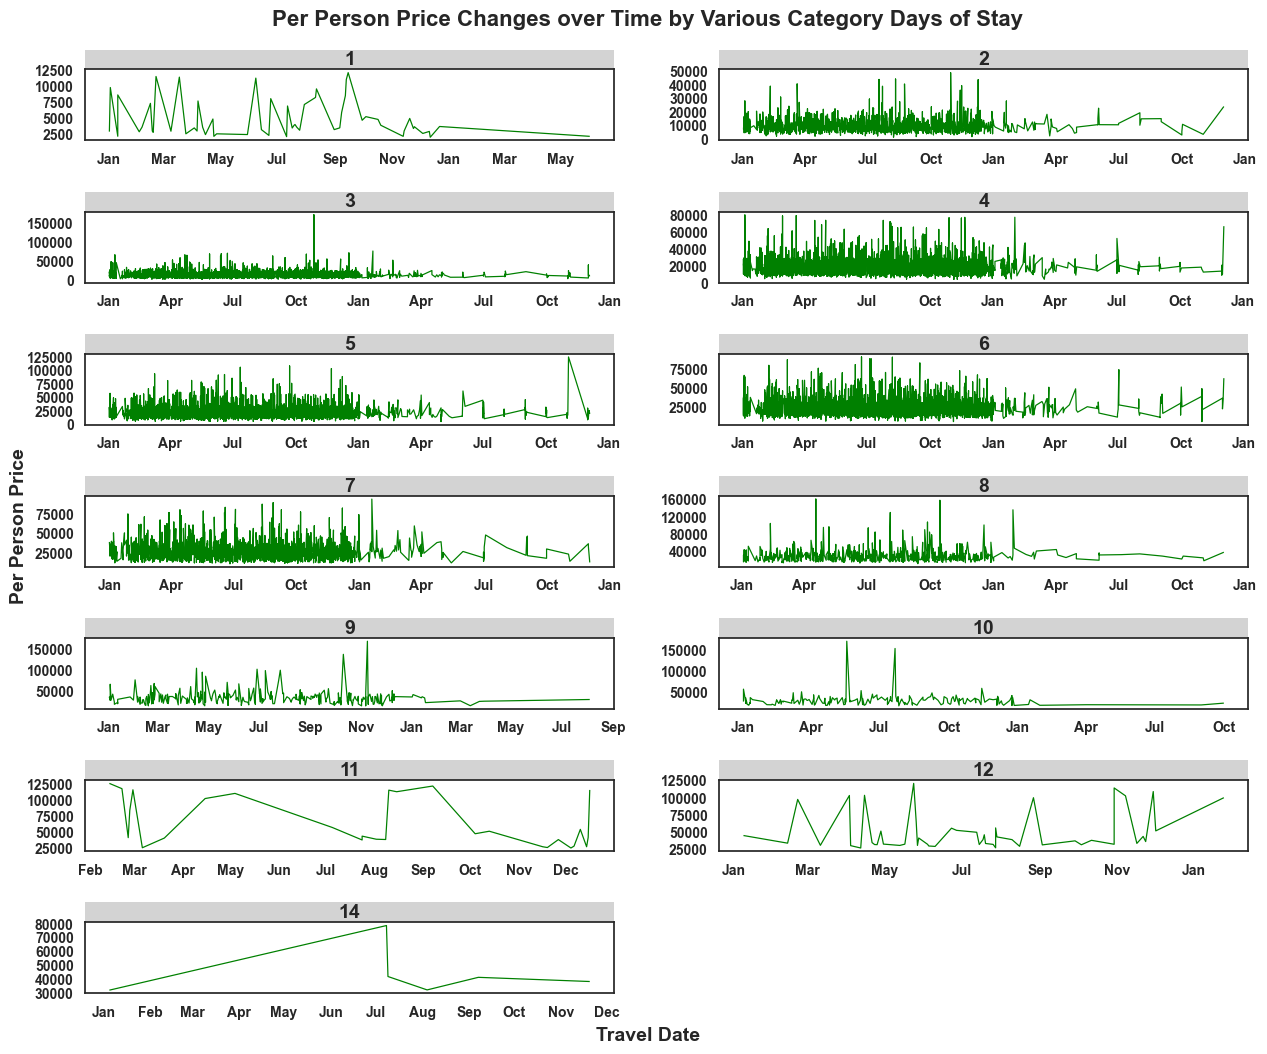

<ggplot: (19127670)>

In [94]:
(ggplot(train)+geom_line(aes(x='Travel Date',y='Per Person Price'),color='green')+
scale_x_datetime(date_labels ="%b")+
facet_wrap('total_days_stay',scales='free',ncol=2)+
labs(title='Per Person Price Changes over Time by Various Category Days of Stay')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,12),
subplots_adjust={'hspace':1,'wspace': 0.2} ,     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=10,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

### let's see how per person price changes over time by various category of destination location count.

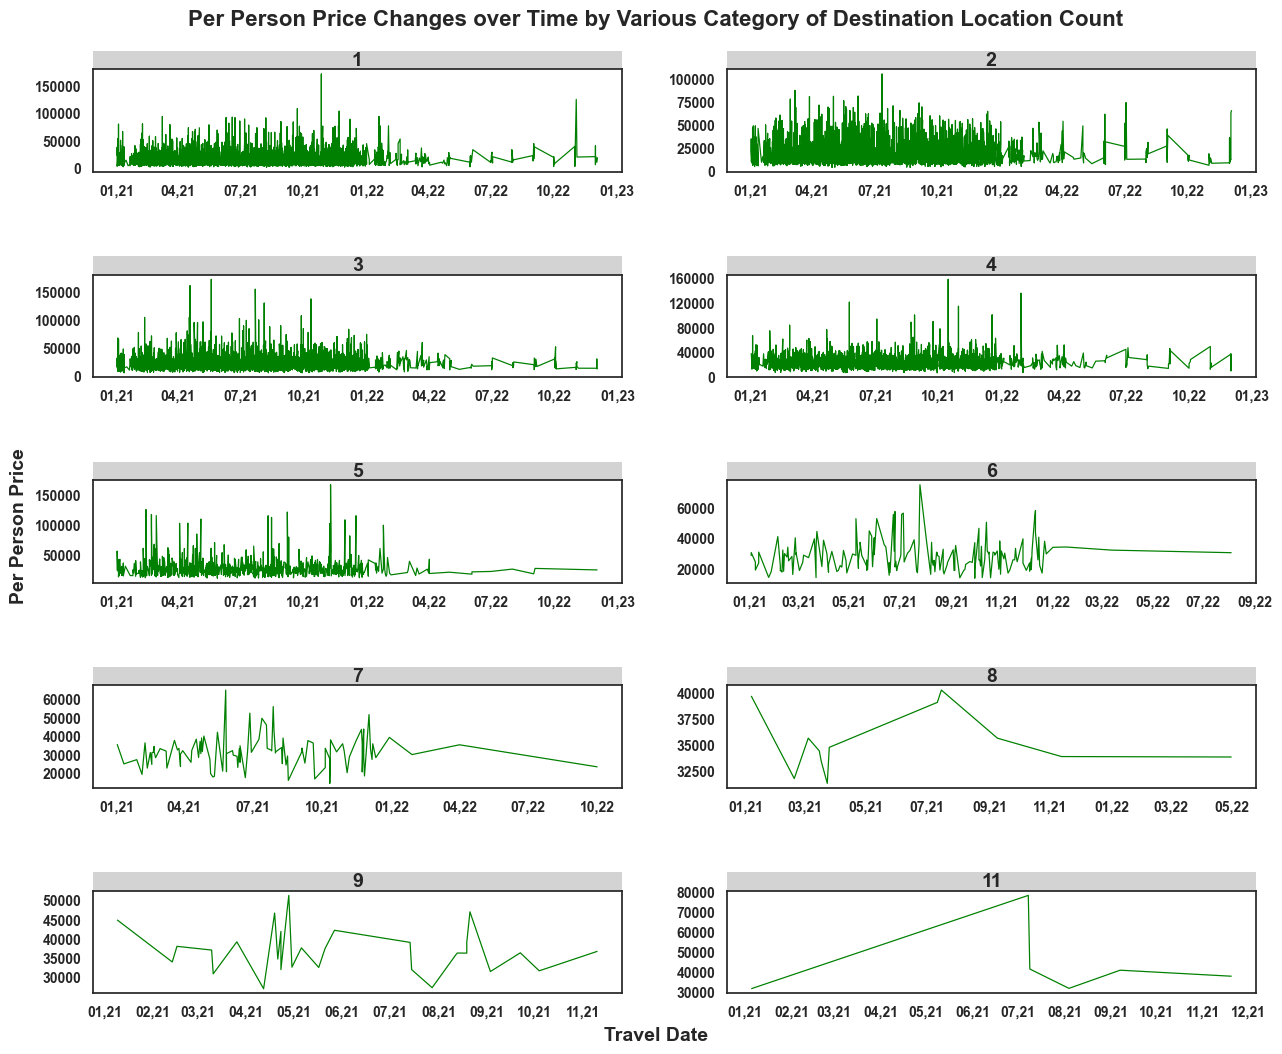

<ggplot: (17814769)>

In [91]:
(ggplot(train)+geom_line(aes(x='Travel Date',y='Per Person Price'),color='green')+
scale_x_datetime(date_labels ="%m,%y")+
facet_wrap('num_of_places',scales='free',ncol=2)+
labs(title='Per Person Price Changes over Time by Various Category of Destinatio Location Count')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,12),
subplots_adjust={'hspace':1,'wspace': 0.2} ,     
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=10,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

### Let's use calplot and see how  per person price changes over time.

In [102]:
import calplot

In [103]:
price = pd.Series(train['Per Person Price'].values, index=train['Travel Date'])

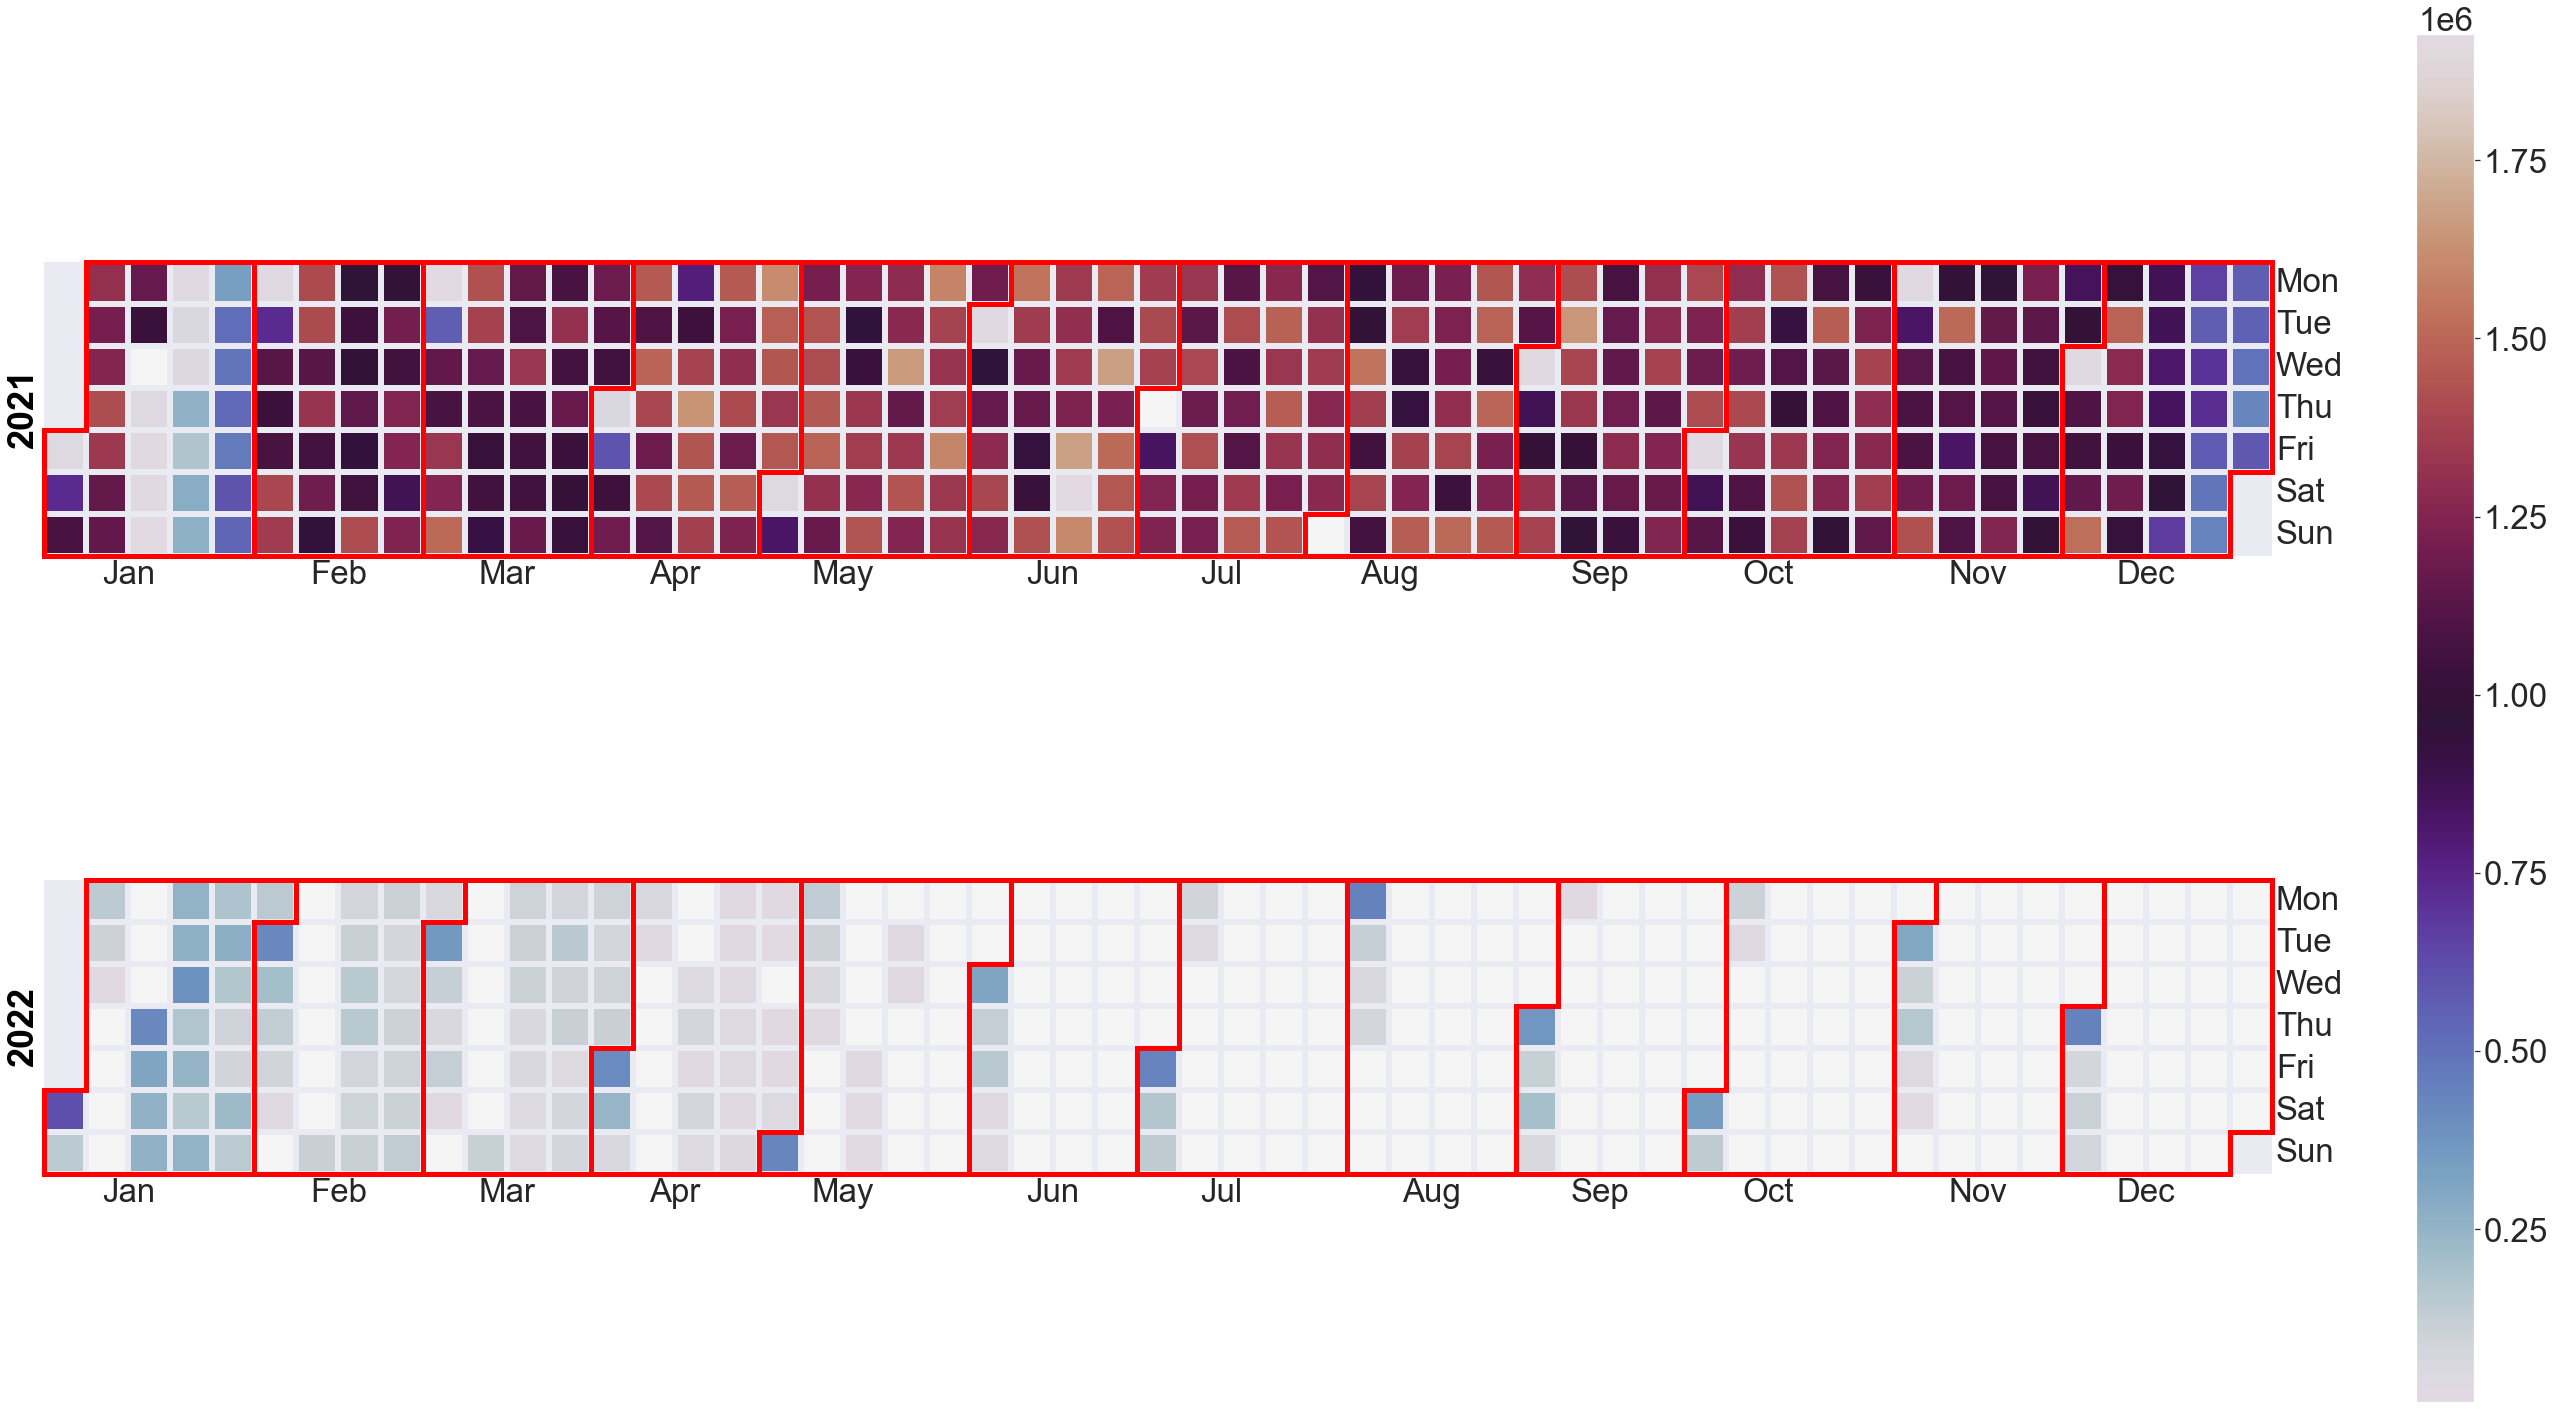

In [105]:
cal_plot=calplot.calplot(price,edgecolor="red",yearcolor="black",cmap='twilight',linewidth=5,
                         yearlabel_kws = {"fontsize":"medium"},
                        figsize=(40,20))